## Matplotlib
    - http://matplotlib.org
    - http://seaborn.pydata.org (Matplotlib 을 도와주는 보조모듈)

### 기본그래프
    - 막대그래프(bar), 선그래프(line), 산포도(scatter), 상자그래프(box), 히스토그램 
    - 질적데이터
        : 요약 방법 -> 도표
          정리 방법 -> 도수 분포표, 분할표
          그래프 -> 막대 그래프, 원그래프 ...
    - 양적데이터
        : 요약 방법 -> 수치
          정리 방법 -> 산술 평균, 중앙값
          그래프 -> 히스토그램, Boxplot, 시계열 그래프, 산포도(산점도)
  

In [1]:
import numpy as np
import pandas as pd
# 전체적인 환경설정 용도
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:\Windows\Fonts\malgun.ttf').get_name()
plt.rc('font', family = font_name)

mpl.rcParams['axes.unicode_minus'] = False

#### 선그래프

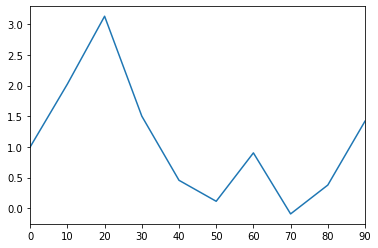

In [8]:
s = pd.Series(np.random.randn(10).cumsum(),
             index = np.arange(0,100,10))
# comsum( )-> 누적 합계
#s.plot()
s.plot.line()

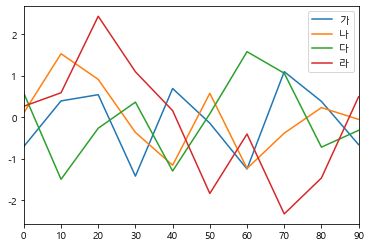

In [22]:
df1 = pd.DataFrame(np.random.randn(10,4), columns =['가','나','다','라'],
                  index = np.arange(0,100,10))
df1.plot()

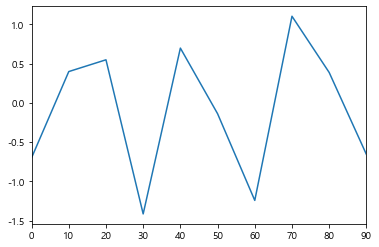

In [23]:
# 원하는 데이터만 뽑아서 그래프 그리기
df1['가'].plot()

#### 막대 그래프

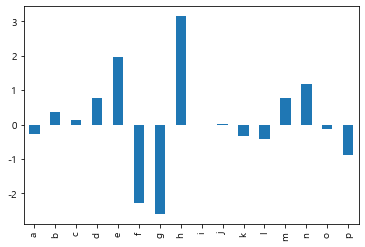

In [29]:
s2 = pd.Series(np.random.randn(16), index =list('abcdefghijklmnop'))
#s2.plot(kind = 'bar')
s2.plot.bar()

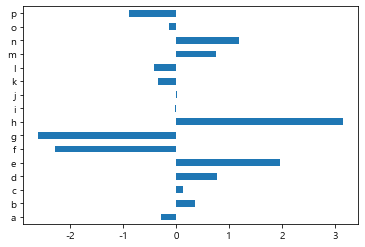

In [31]:
# 막대를 수평으로!
#s2.plot(kind = 'barh')
s2.plot.barh()

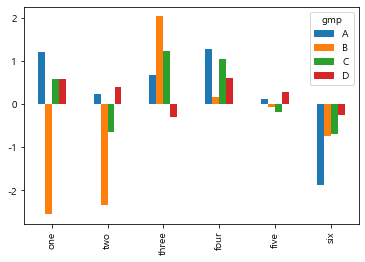

In [36]:
# 범례에 이름 넣기!
df2 = pd.DataFrame(np.random.randn(6,4), index = ['one','two','three','four','five','six']
                  , columns = pd.Index(['A','B','C','D'], name = 'gmp'))
df2.plot(kind = 'bar')

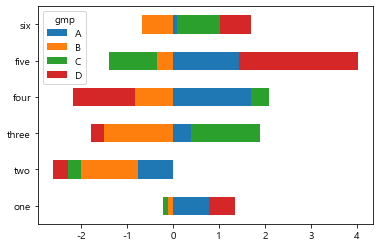

In [39]:
# 그래프 쌓아놓기

df2.plot(kind = 'barh', stacked = True)

#### 히스토그램
    - X 변수가 가질 수 있는 값의 범위
    - 값만 필요하고 인덱스는 필요가 없음

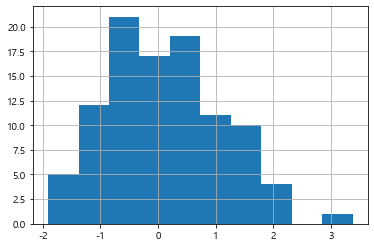

In [2]:
s3 = pd.Series(np.random.normal(0,1, size = 100))
s3.hist()

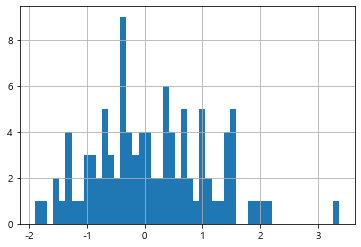

In [3]:
# 더 자세한 분포 확인 (기본값은 10)
s3.hist(bins = 50)

#### 산포도(산점도, scatter)
    - 두 변수의 관계 확인 (양, 음)

[[ 2.77911175 -7.7973813 ]
 [ 1.63662008  1.64658748]
 [ 0.912251    2.36258438]
 [ 0.90732055 -1.69173137]
 [ 1.54723483 -6.17774256]]


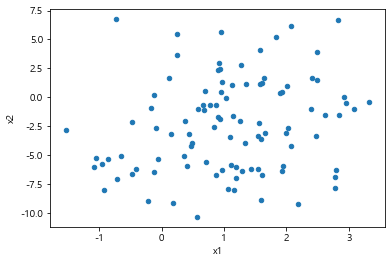

In [10]:
x1 = np.random.normal(1,1, size = (100,1))
x2 = np.random.normal(-2,4,size = (100,1))


x = np.concatenate((x1,x2), axis = 1)

print(x[:5])

df3 = pd.DataFrame(x, columns = ['x1','x2'])

df3.head()

df3.plot.scatter('x1','x2')

#### Box plot
    - 연속형 변수와 이산형 변수를 함께 그리는 그래프.
    - 2개 이상의 변수를 사용해서 그래프를 그릴 수 있음. = 다변량 그래프

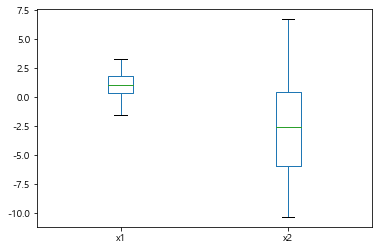

In [11]:
df3.plot.box()

### 정교한 그래프

In [12]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0, 0.5, 'Total Bill')

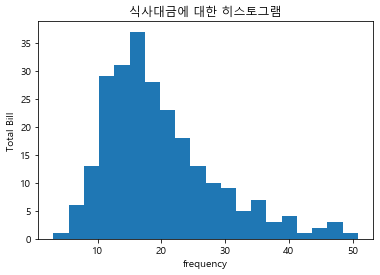

In [16]:
fig = plt.figure()
# 1행 1열 크기의 한개의 그래프
ax = fig.add_subplot(1,1,1)

# total_bill의 금액 분포를 확인
ax.hist(tips['total_bill'], bins = 20)
ax.set_title('식사대금에 대한 히스토그램')
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

Text(0, 0.5, 'Tip')

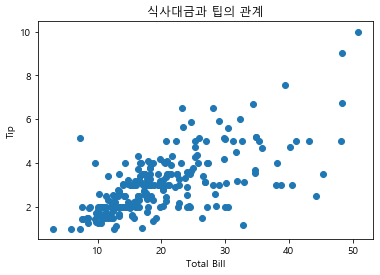

In [20]:
# Tip 과 total bill 의 관계
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(tips['total_bill'], tips['tip'])
ax.set_title('식사대금과 팁의 관계')
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

Text(0, 0.5, 'Tip')

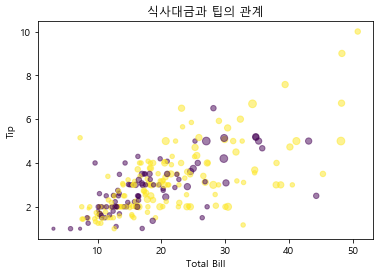

In [25]:
# 식사값과 팁의 관계를 확인할 때 성별에 따라 색을 가족 수에 따라 크기를 다르게 함 (alpha = 투명도)

def record_sex(sex):
    if sex =='Female':
        return 0
    else:
        return 1
    
tips['sex_color'] = tips['sex'].apply(record_sex)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(tips['total_bill'], tips['tip'], c =tips['sex_color'], s = tips['size']*10, alpha = 0.5)
ax.set_title('식사대금과 팁의 관계')
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")


Text(0.5, 1.0, '성별에 따른 팁의 변화')

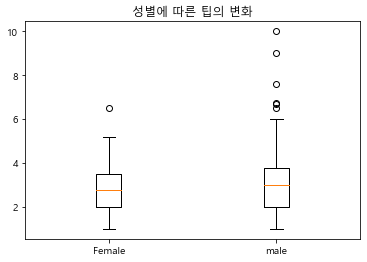

In [30]:
# 성별과 Tip의 관계 = Box plot

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.boxplot([tips[tips['sex'] == 'Female']['tip'], 
            tips[tips['sex'] == 'Male']['tip']], labels = ['Female', "male"])
ax.set_title('성별에 따른 팁의 변화')


### seaborn

In [31]:
tips = sns.load_dataset('tips')

Text(0, 0.5, 'Total Bill')

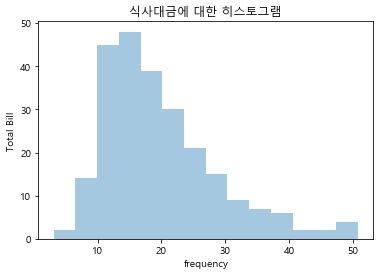

In [34]:
# 기본값, 하나의 그래프만 그릴 시에 사용
ax = plt.subplot()

#total_bill에 금액 분포를 확인
# 히스토그램 빼고 출력
#ax = sns.distplot(tips['total_bill'], hist = False)
# 선그래프 빼고 출력
ax = sns.distplot(tips['total_bill'], kde = False)
ax.set_title('식사대금에 대한 히스토그램')
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

Text(0, 0.5, 'Total Bill')

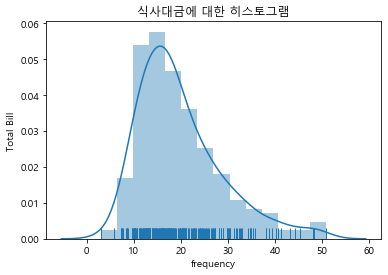

In [35]:
# rug =  값의 분포도를 넣어줌.
ax = plt.subplot()

ax = sns.distplot(tips['total_bill'],rug = True)
ax.set_title('식사대금에 대한 히스토그램')
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

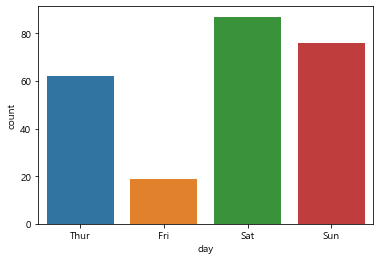

In [36]:
# 요일별로 tip의 빈도수 확인

sns.countplot('day', data = tips)

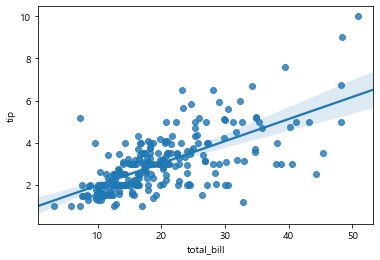

In [37]:
#Tip 과 Total Bill의 관계
sns.regplot(x = 'total_bill', y = 'tip', data=tips)

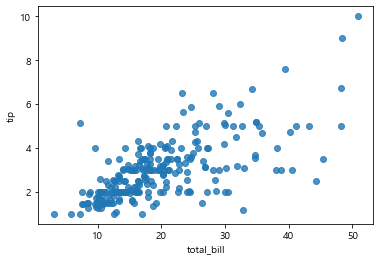

In [38]:
#Tip 과 Total Bill의 관계 회귀선 제외
sns.regplot(x = 'total_bill', y = 'tip', data=tips, fit_reg = False)

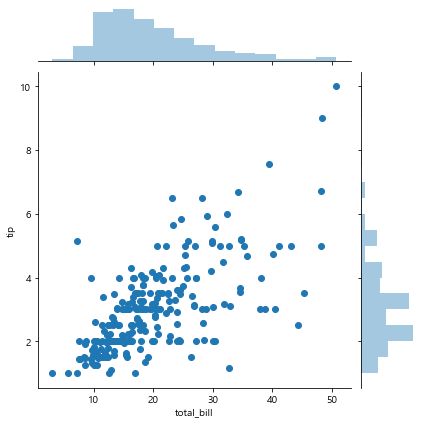

In [40]:
# 히스토그램과 산포도를 같이 보여줌
sns.jointplot(x = 'total_bill', y = 'tip', data=tips)

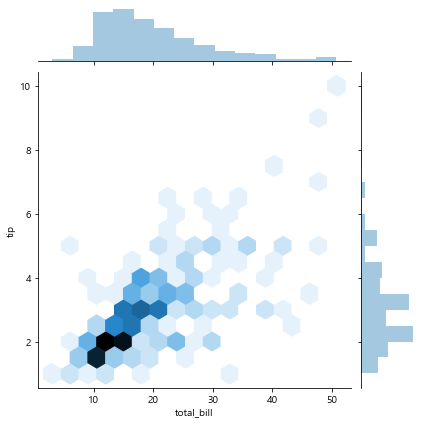

In [41]:
# 산포도를 벌집 모양으로 변경

sns.jointplot(x = 'total_bill', y = 'tip', data=tips, kind = 'hex')

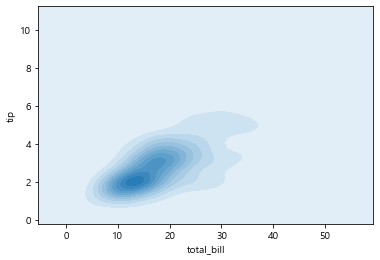

In [44]:
# 등고선 모양, 그림자 효과.
sns.kdeplot(data = tips['total_bill'], data2 = tips['tip'], shade =True)

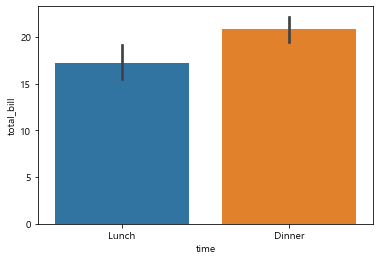

In [46]:
sns.barplot(x = 'time', y = 'total_bill', data = tips)

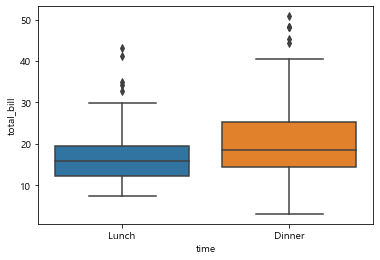

In [47]:
sns.boxplot(x = 'time', y = 'total_bill', data = tips)

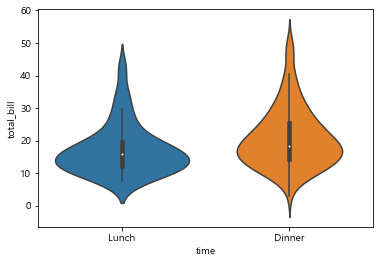

In [48]:
#상자그래프를 바이올린 모양으로
sns.violinplot(x = 'time', y = 'total_bill', data = tips)

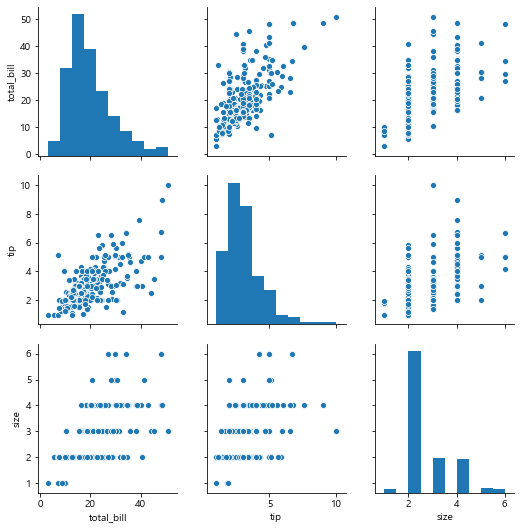

In [49]:
# 더 많은 양의 변수를 한꺼번에 분석
sns.pairplot(tips)

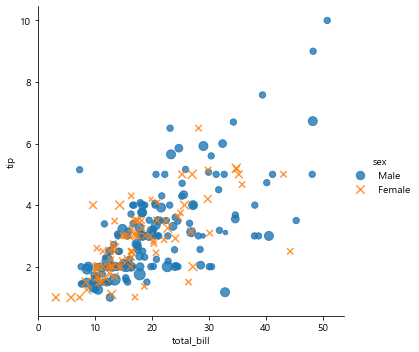

In [57]:
# 식사대금과 팁, 성별의 관계

sns.lmplot(x = 'total_bill', y = 'tip', data = tips, fit_reg = False, hue = 'sex', scatter_kws={'s':tips['size']*20},
          markers = ['o','x'])

### 지도 시각화
    - pip install folium

In [58]:
import folium

In [87]:
map = folium.Map(location = [51.500797, -0.124606])
map = folium.Map(location = [51.500797, -0.124606], zoom_start = 15)
map = folium.Map(location = [51.500797, -0.124606], zoom_start = 15, tiles = 'Stamen Toner')

map

In [71]:
state_unemp =  pd.read_csv('C:\\Users\\acorn\\python\\analysis\\data\\unemployment\\folium_US_Unemployment_Oct2012.csv')

state_unemp.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [86]:
map = folium.Map(location = [40,-98], zoom_start = 4)

state_geo = 'C:\\Users\\acorn\\python\\analysis\\data\\unemployment\\folium_us-states.json'

map.choropleth(geo_data =  state_geo, data = state_unemp, key_on = 'feature.id', 
               columns = ['State', 'Unemployment'], fill_colors = 'YlCn')
map

In [96]:
# 좌표위치에 마커달기

map = folium.Map(location = [51.499624, -0.133757], zoom_start = 15)

folium.Marker(location = [51.499624, -0.133757], popup = 'St. James\'s Park Station',
              icon = folium.Icon(color = 'red', icon = 'star')).add_to(map)

folium.CircleMarker(location = [51.499624, -0.133757], popup = 'St. James\'s Park Station',
                  radius = 50, color = '#ffffgg', fill_color = '#fffggg').add_to(map)
map

### WordCloud
    - pip install wordcloud

In [97]:
from wordcloud import WordCloud, STOPWORDS

In [101]:
text = open('C:\\Users\\acorn\\python\\analysis\\data\\wordcloud\\constitution.txt')
text = text.read()
text[:100]

'We the People of the United States, in Order to form a more perfect Union, establish Justice, insure'

(-0.5, 399.5, 199.5, -0.5)

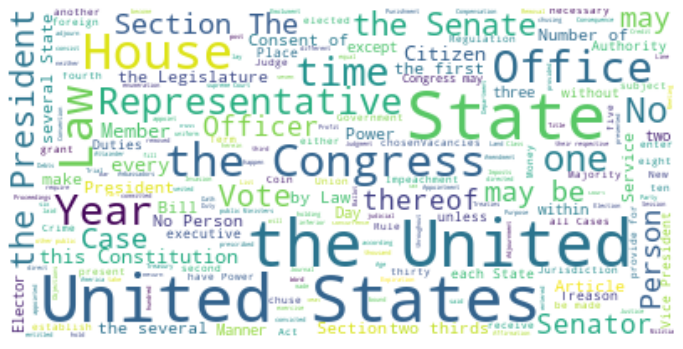

In [111]:
# text 변수를 워드클라우드로 만들겠다. 검은색이 이쁜데..?
wc = WordCloud(max_font_size = 40, background_color = 'white').generate(text)
dir(wc)
wc.words_

plt.figure(figsize = (12,12) )
# 이미지 출력, 깔끔하게!
plt.imshow(wc, interpolation = 'bilinear')
# 축 없에기
plt.axis('off')

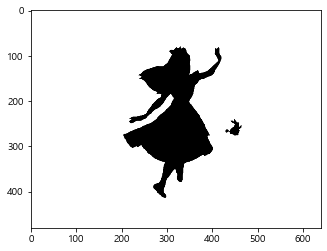

In [116]:
# 이미지에 워드클라우드 하기

from PIL import Image 

# 숫자로 그림 가져오기
alice_mask = np.array(Image.open('C:\\Users\\acorn\\python\\analysis\\data\\wordcloud\\alice_mask.png'))
alice_mask

# 그림으로 출력!
plt.imshow(alice_mask)


In [121]:
text = open('C:\\Users\\acorn\\python\\analysis\\data\\wordcloud\\alice.txt').read()
text[:100]



"癤풮roject Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use o"

(-0.5, 639.5, 479.5, -0.5)

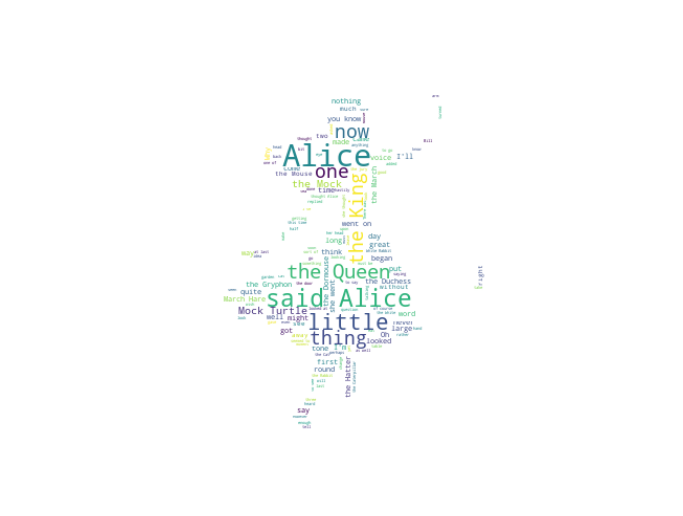

In [128]:
# 자주 쓰지 않는 단어 제거

stop = set(STOPWORDS)
# 제거할 단어 추가
stop.add('said')

# 엘리스 그림 위에 워드클라우드 만들기
wc = WordCloud(mask = alice_mask, stopwords = stop, background_color = 'white').generate(text)


plt.figure(figsize = (12,12) )
# 이미지 출력, 깔끔하게!
plt.imshow(wc, interpolation = 'bilinear')
# 축 없에기
plt.axis('off')

#### konlpy
    - 한글전용 워드클라우드
    - http://konlpy.org
    - https://konlpy-ko.readthedocs.io/ko/v0.4.3/ -> 임시 한국어 사이트
    - pip install konlpy

In [130]:
import platform
print(platform.architecture())

In [146]:
from konlpy.tag import Okt
# = from konlpy.tag import Twitter

from konlpy.corpus import kolaw

# 단어별로 빈도수 계산
import nltk

3882
3211


(-0.5, 488.5, 726.5, -0.5)

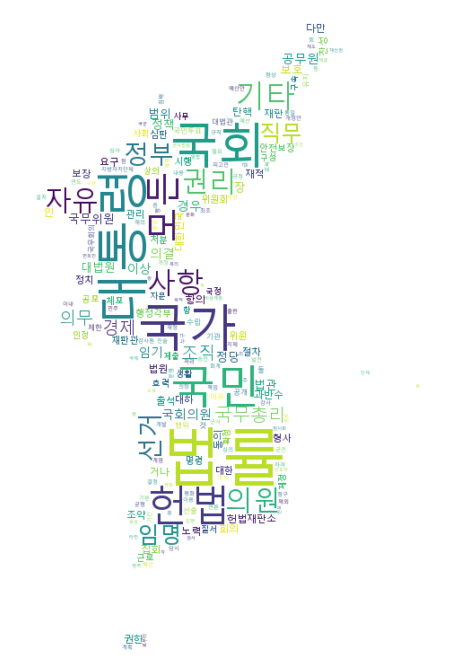

In [150]:
ko_txt = kolaw.open('constitution.txt').read()

ko_txt[:200]

stop_words = ['제', '월', '일', '조', '수', '때','그', '이','바','및','안','정', '위', '관']

t =  Okt()
# 명사만 분류
# t.nouns('아버지가방에들어가신다.')
ko_token = t.nouns(ko_txt)
print(len(ko_token))

# 의미없는 단어 거르기
ko_token = [each_word for each_word in ko_token if each_word not in stop_words]

print(len(ko_token))

# 빈도수 계산하기!
ko = nltk.Text(ko_token)
ko.vocab()

# 많이 사용되는 단어 뽑아내기
data = ko.vocab().most_common(500)

# 숫자로 그림 가져오기
korea_map = np.array(Image.open('C:\\Users\\acorn\\python\\analysis\\data\\wordcloud\\korea_map.jpg'))


# 클라우드 만들기!
wc = WordCloud(mask = korea_map, font_path = 'C:\Windows\Fonts\malgun.ttf' ,
               background_color = 'white').generate_from_frequencies(dict(data))


plt.figure(figsize = (12,12) )
# 이미지 출력, 깔끔하게!
plt.imshow(wc, interpolation = 'bilinear')
# 축 없에기
plt.axis('off')